Image classification setup with tensorflow/keras

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')

Loading datasets

In [ ]:
base_dir = r"C:\Users\kanimozhi\Downloads\Dataset"

Directory permission management script

In [22]:
import os
import stat

# Define the path to the dataset directory
base_dir = r"C:\Users\kanimozhi\Downloads\Dataset"
# Now walk through the directory and set permissions
# Use dataset_path instead of data_dir
for root, dirs, files in os.walk(base_dir):
    print(f"Directory: {root}")
    print(f"Files: {files}")  # This will print files in each directory
    for d in dirs:
        os.chmod(os.path.join(root, d), stat.S_IRWXU)  # Set directory permissions
    for f in files:
        os.chmod(os.path.join(root, f), stat.S_IRWXU)  # Set file permissions
!find /content/drive/MyDrive/Dataset -name ".ipynb_checkpoints" -type d -exec rm -rf {} +

Directory: C:\Users\kanimozhi\Downloads\Dataset
Files: []
Directory: C:\Users\kanimozhi\Downloads\Dataset\test
Files: []
Directory: C:\Users\kanimozhi\Downloads\Dataset\test\COVID
Files: ['COVID19(460).jpg', 'COVID19(461).jpg', 'COVID19(462).jpg', 'COVID19(463).jpg', 'COVID19(464).jpg', 'COVID19(465).jpg', 'COVID19(466).jpg', 'COVID19(467).jpg', 'COVID19(468).jpg', 'COVID19(469).jpg', 'COVID19(470).jpg', 'COVID19(471).jpg', 'COVID19(472).jpg', 'COVID19(473).jpg', 'COVID19(474).jpg', 'COVID19(475).jpg', 'COVID19(476).jpg', 'COVID19(477).jpg', 'COVID19(478).jpg', 'COVID19(479).jpg', 'COVID19(480).jpg', 'COVID19(481).jpg', 'COVID19(482).jpg', 'COVID19(483).jpg', 'COVID19(484).jpg', 'COVID19(485).jpg', 'COVID19(486).jpg', 'COVID19(487).jpg', 'COVID19(488).jpg', 'COVID19(489).jpg', 'COVID19(490).jpg', 'COVID19(491).jpg', 'COVID19(492).jpg', 'COVID19(493).jpg', 'COVID19(494).jpg', 'COVID19(495).jpg', 'COVID19(496).jpg', 'COVID19(497).jpg', 'COVID19(498).jpg', 'COVID19(499).jpg', 'COVID19(500

FIND: Invalid switch


Image file counter script

In [23]:
import os

def count_images_in_folder(folder_path):
    # List of common image file extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'}

    # Initialize image count
    image_count = 0

    # Traverse through the directory
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file has an image extension
            if os.path.splitext(file)[1].lower() in image_extensions:
                image_count += 1

    return image_count

Dataset image counter

In [24]:
import os

def count_images_in_folder(folder_path):
    """Counts the number of image files in a given folder."""
    if not os.path.exists(folder_path):
        return 0
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Define dataset path
base_dir = r"C:\Users\kanimozhi\Downloads\Dataset"

# Count images in train dataset
train_covid = count_images_in_folder(os.path.join(base_dir, "train", "COVID19"))
train_normal = count_images_in_folder(os.path.join(base_dir, "train", "NORMAL"))
train_tb = count_images_in_folder(os.path.join(base_dir, "train", "TUBERCULOSIS"))

# Count images in test dataset
test_covid = count_images_in_folder(os.path.join(base_dir, "test", "COVID19"))
test_normal = count_images_in_folder(os.path.join(base_dir, "test", "NORMAL"))
test_tb = count_images_in_folder(os.path.join(base_dir, "test", "TUBERCULOSIS"))

# Count images in validation dataset
val_covid = count_images_in_folder(os.path.join(base_dir, "val", "COVID19"))
val_normal = count_images_in_folder(os.path.join(base_dir, "val", "NORMAL"))
val_tb = count_images_in_folder(os.path.join(base_dir, "val", "TUBERCULOSIS"))

# Print results
print(f"Train - COVID19: {train_covid}, NORMAL: {train_normal}, TUBERCULOSIS: {train_tb}")
print(f"Test - COVID19: {test_covid}, NORMAL: {test_normal}, TUBERCULOSIS: {test_tb}")
print(f"Validation - COVID19: {val_covid}, NORMAL: {val_normal}, TUBERCULOSIS: {val_tb}")

Train - COVID19: 0, NORMAL: 1341, TUBERCULOSIS: 650
Test - COVID19: 0, NORMAL: 234, TUBERCULOSIS: 41
Validation - COVID19: 0, NORMAL: 8, TUBERCULOSIS: 12


Data  visualization

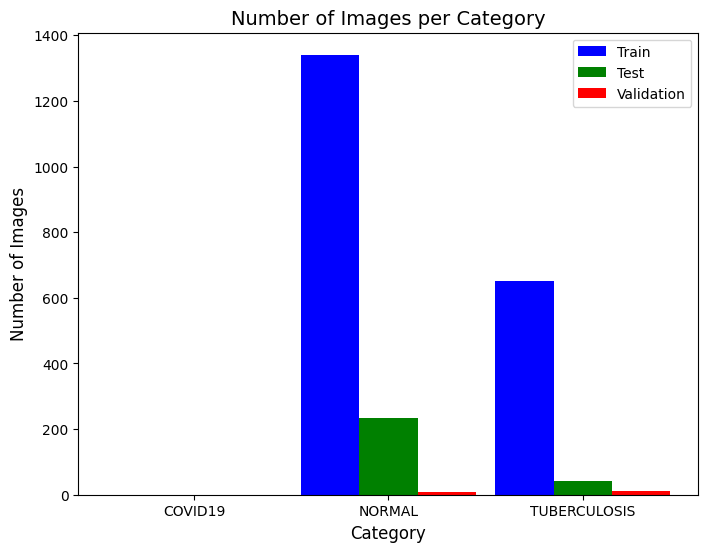

In [25]:
import os
import matplotlib.pyplot as plt

def count_images_in_folder(folder_path):
    """Counts the number of image files in a given folder."""
    if not os.path.exists(folder_path):
        return 0
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Define dataset path
base_dir = r"C:\Users\kanimozhi\Downloads\Dataset"

# Count images in train dataset
train_counts = {
    "COVID19": count_images_in_folder(os.path.join(base_dir, "train", "COVID19")),
    "NORMAL": count_images_in_folder(os.path.join(base_dir, "train", "NORMAL")),
    "TUBERCULOSIS": count_images_in_folder(os.path.join(base_dir, "train", "TUBERCULOSIS"))
}

# Count images in test dataset
test_counts = {
    "COVID19": count_images_in_folder(os.path.join(base_dir, "test", "COVID19")),
    "NORMAL": count_images_in_folder(os.path.join(base_dir, "test", "NORMAL")),
    "TUBERCULOSIS": count_images_in_folder(os.path.join(base_dir, "test", "TUBERCULOSIS"))
}

# Count images in validation dataset
val_counts = {
    "COVID19": count_images_in_folder(os.path.join(base_dir, "val", "COVID19")),
    "NORMAL": count_images_in_folder(os.path.join(base_dir, "val", "NORMAL")),
    "TUBERCULOSIS": count_images_in_folder(os.path.join(base_dir, "val", "TUBERCULOSIS"))
}

# Data for visualization
categories = ["COVID19", "NORMAL", "TUBERCULOSIS"]
train_values = [train_counts[c] for c in categories]
test_values = [test_counts[c] for c in categories]
val_values = [val_counts[c] for c in categories]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.3
x = range(len(categories))

ax.bar(x, train_values, width=bar_width, color='blue', label='Train')
ax.bar([i + bar_width for i in x], test_values, width=bar_width, color='green', label='Test')
ax.bar([i + 2 * bar_width for i in x], val_values, width=bar_width, color='red', label='Validation')

ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(categories)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Number of Images", fontsize=12)
ax.set_title("Number of Images per Category", fontsize=14)
ax.legend()

plt.show()

set paths

In [26]:
import os
base_dir = "C:/Users/kanimozhi/Downloads/Dataset"
train_path = os.path.join(base_dir, "train")
test_path = os.path.join(base_dir, "test")


Class folders

In [27]:
# To list class folders
image_classes = os.listdir(train_path)
print("Classes:",image_classes)

Classes: ['COVID', 'NORMAL', 'TUBERCULOSIS']


Install pillow packages

In [28]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable


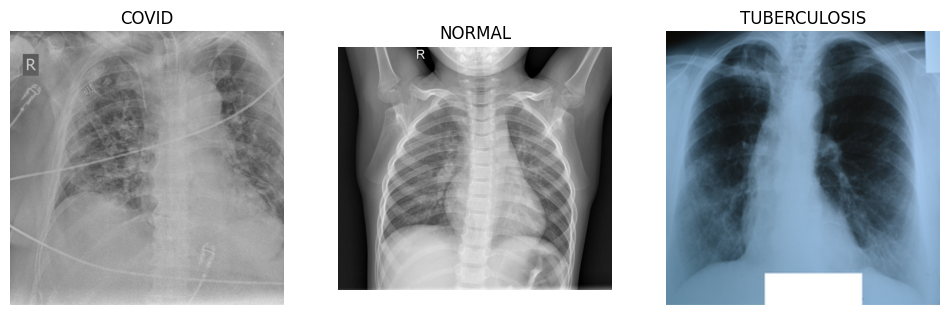

In [30]:

# Function to plot images
def plot_image(image_classes):
    plt.figure(figsize=(12, 12))  # figure size

    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category  # enter the train file and get the images
        image_in_folder = os.listdir(image_path)  # put each path in list

        if image_in_folder:
            first_image_in_folder = image_in_folder[0]  # get the first image in each category
            first_image_path = image_path + '/' + first_image_in_folder  # get the path of each pic

            img = image.load_img(first_image_path)  # load images
            img_array = image.img_to_array(img) / 255  # convert it to np array

            plt.subplot(1, 3, i + 1)  # 1 row 3 columns
            plt.imshow(img_array)  # show image
            plt.title(category)  # mention name of each category
            plt.axis('off')
        else:
            print(f"Warning: Folder '{category}' is empty. Skipping...")

    plt.show()

# Call the function
plot_image(image_classes)

pandas packages

In [22]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


plotly packages

In [23]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


Image dataset visualization

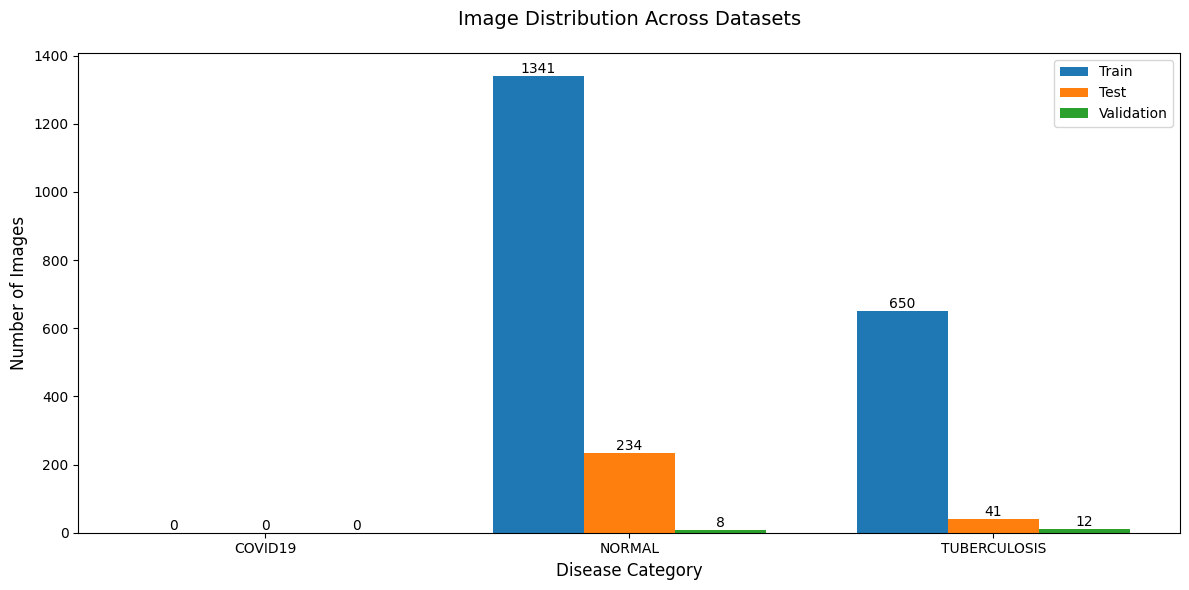

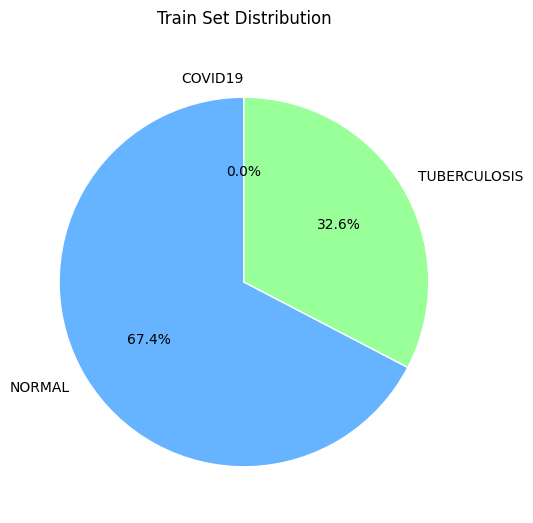

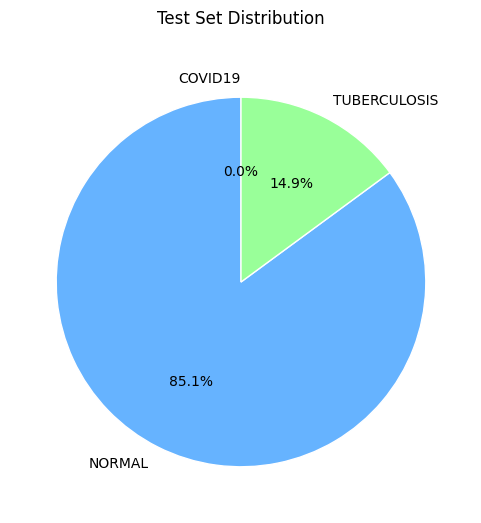

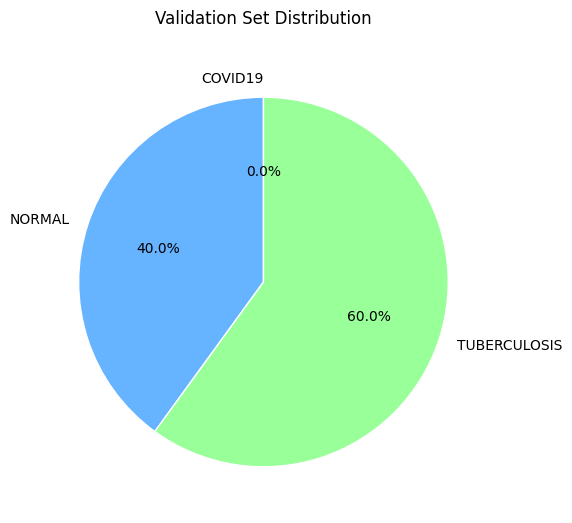

In [31]:
import os
import matplotlib.pyplot as plt

def count_images_in_folder(folder_path):
    """Counts the number of image files in a given folder."""
    if not os.path.exists(folder_path):
        return 0
    return len([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Define dataset path
base_dir = r"C:\Users\kanimozhi\Downloads\Dataset"

# Count images in each dataset
def get_counts(dataset_type):
    return {
        "COVID19": count_images_in_folder(os.path.join(base_dir, dataset_type, "COVID19")),
        "NORMAL": count_images_in_folder(os.path.join(base_dir, dataset_type, "NORMAL")),
        "TUBERCULOSIS": count_images_in_folder(os.path.join(base_dir, dataset_type, "TUBERCULOSIS"))
    }

train_counts = get_counts("train")
test_counts = get_counts("test")
val_counts = get_counts("val")

# Prepare data for visualization
categories = list(train_counts.keys())
train_values = list(train_counts.values())
test_values = list(test_counts.values())
val_values = list(val_counts.values())

# Set up the figure
plt.figure(figsize=(12, 6))

# Set width of bars
bar_width = 0.25
x_pos = range(len(categories))

# Create bars for each dataset
plt.bar(x_pos, train_values, width=bar_width, label='Train', color='#1f77b4')
plt.bar([x + bar_width for x in x_pos], test_values, width=bar_width, label='Test', color='#ff7f0e')
plt.bar([x + 2*bar_width for x in x_pos], val_values, width=bar_width, label='Validation', color='#2ca02c')

# Add labels and title
plt.xlabel('Disease Category', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Image Distribution Across Datasets', fontsize=14, pad=20)

# Add x-axis ticks and legend
plt.xticks([x + bar_width for x in x_pos], categories)
plt.legend()

# Add value labels on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom')

add_value_labels(plt.gca().patches)

plt.tight_layout()
plt.show()

# Additional: Create separate pie charts for each dataset
for dataset_name, counts in [('Train', train_counts), ('Test', test_counts), ('Validation', val_counts)]:
    plt.figure(figsize=(6, 6))
    plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%',
            colors=['#ff9999','#66b3ff','#99ff99'], startangle=90,
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    plt.title(f'{dataset_name} Set Distribution', pad=20)
    plt.show()

Data augmentation configuration

In [32]:
data_generator=ImageDataGenerator(rescale=1/255,   rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
# let all images to be the same size

Training data generator

In [33]:
#generate photos using data generator to use it as photos not paths
train_data = data_generator.flow_from_directory(
  train_path,  #give train path
    target_size=(224,224),  #let all photos the size you want
    batch_size= 16  # take 16 photos at one time
)

Found 2451 images belonging to 3 classes.


Test data generator

In [34]:
test_data = data_generator.flow_from_directory(
  test_path,  #give train path
    target_size=(224,224),  #let all photos the size you want
    batch_size= 1  # take 1 photos at one time  (default 32)
)

Found 381 images belonging to 3 classes.


Sequential model construction

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Ensure Sequential is used directly as it is already imported in a previous cell
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                 activation='relu', input_shape=[224, 224, 3]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())

# Add flatten and dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
# Ensure image_classes is used from the previously defined cell
# Ensure image_classes is defined
if 'image_classes' not in locals():
    # Ensure os is imported
    if 'os' not in globals():
        import os
    # Ensure train_path is defined
    if 'train_path' not in locals():
        train_path = os.path.join(base_dir, "train")
    image_classes = os.listdir(train_path)  # Redefine image_classes if not already defined

num_classes = len(image_classes)

# Update the final layer of your model:
model.add(Dense(num_classes, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,955,331 (49.42 MB)

 Trainable params: 12,955,331 (49.42 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


Model compilation

In [40]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'] # catgorical
             )

Fit the model

In [41]:
model_history = model.fit(train_data,
                          epochs=10, # Adjust the number of epochs as needed
                          validation_data=test_data)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.6099 - loss: 0.9896 - val_accuracy: 0.6982 - val_loss: 0.7711
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.7993 - loss: 0.5167 - val_accuracy: 0.8373 - val_loss: 0.4284
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.8566 - loss: 0.3966 - val_accuracy: 0.8635 - val_loss: 0.3653
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.8700 - loss: 0.3381 - val_accuracy: 0.8425 - val_loss: 0.4215
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.8913 - loss: 0.3186 - val_accuracy: 0.7900 - val_loss: 0.5613
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9156 - loss: 0.2518 - val_accuracy: 0.8084 - val_loss: 0.4261
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.9114 - loss: 0.2407 - val_accuracy: 0.7874 - val_loss: 0.5484
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.9012 - loss: 0.2636 - val_accu

Train loss and validation loss

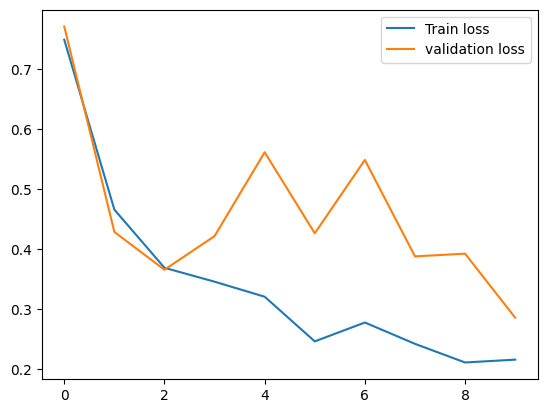

In [42]:
plt.plot(model_history.history['loss'],label='Train loss')
plt.plot(model_history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

Train accuracy and validation accuracy

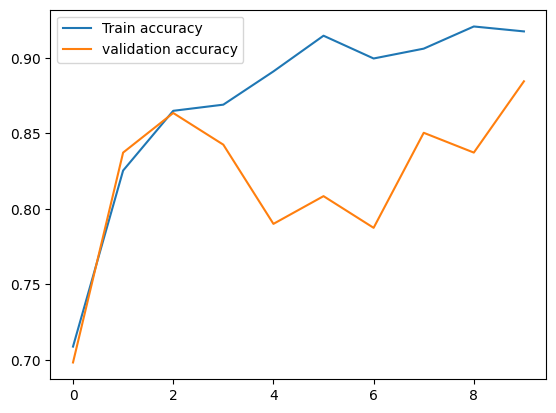

In [43]:
plt.plot(model_history.history['accuracy'],label='Train accuracy')
plt.plot(model_history.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

Confusion Matrix

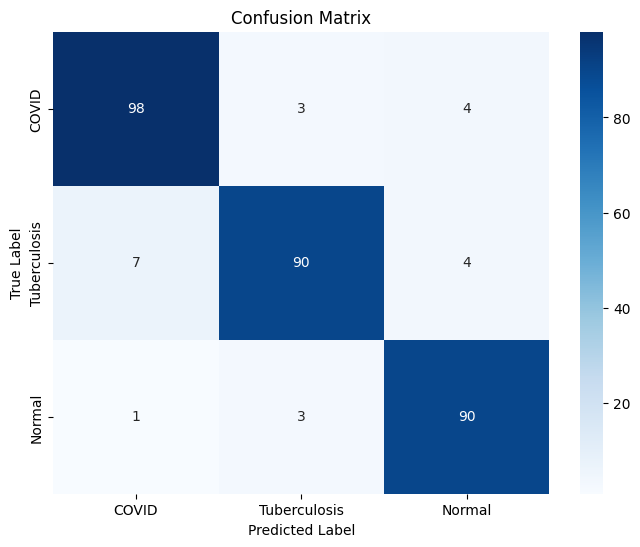

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define class names
class_names = ['COVID', 'Tuberculosis', 'Normal']

# Generate a multiclass classification dataset with 3 classes
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=5, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [52]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Define class names
class_names = ['COVID', 'Tuberculosis', 'Normal']

# Generate a multiclass classification dataset with 3 classes
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=5, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Compute precision, recall, and F1 score for each class and overall
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# Alternatively, compute macro-averaged precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"averaged Precision: {precision:.2f}")
print(f"averaged Recall: {recall:.2f}")
print(f"averaged F1 Score: {f1:.2f}")


Classification Report:

              precision    recall  f1-score   support

       COVID       0.92      0.93      0.93       105
Tuberculosis       0.94      0.89      0.91       101
      Normal       0.92      0.96      0.94        94

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

averaged Precision: 0.93
averaged Recall: 0.93
averaged F1 Score: 0.93


In [53]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Define class names
class_names = ['COVID', 'Tuberculosis', 'Normal']

# Generate a multiclass classification dataset with 3 classes
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=5, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Binarize the output labels for ROC AUC computation
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a One-vs-Rest logistic regression classifier
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X_train, y_train)

# Predict probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC AUC score for each class
roc_auc_scores = {}
for i, class_name in enumerate(class_names):
    roc_auc = roc_auc_score(y_test[:, i], y_score[:, i])
    roc_auc_scores[class_name] = roc_auc

# Print ROC AUC scores by class
for class_name, score in roc_auc_scores.items():
    print(f"ROC AUC score for class {class_name}: {score:.2f}")


ROC AUC score for class COVID: 0.91
ROC AUC score for class Tuberculosis: 0.98
ROC AUC score for class Normal: 0.97


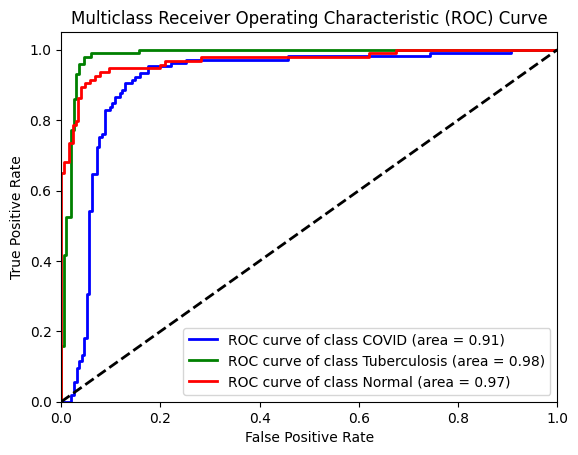

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

# Define class names
class_names = ['COVID', 'Tuberculosis', 'Normal']

# Generate a multiclass classification dataset with 3 classes
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=5, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Binarize the output labels for ROC computation
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a One-vs-Rest logistic regression classifier
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X_train, y_train)

# Predict probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


multiclass precision recall curve

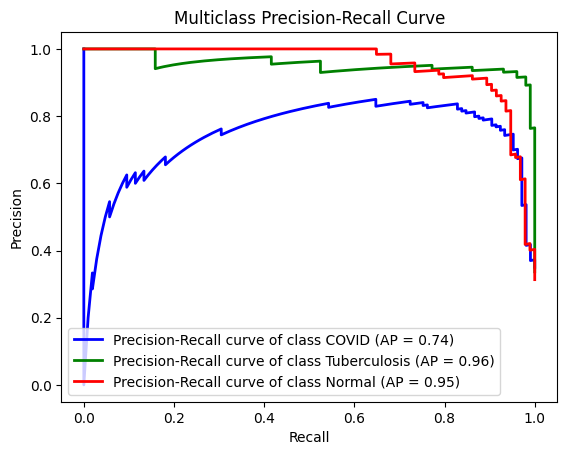

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score

# Define class names
class_names = ['COVID', 'Tuberculosis', 'Normal']

# Generate a multiclass classification dataset with 3 classes
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=5, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Binarize the output labels for precision-recall computation
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a One-vs-Rest logistic regression classifier
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X_train, y_train)

# Predict probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# Plot precision-recall curves for all classes
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(len(class_names)), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Precision-Recall curve of class {class_names[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [56]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define class names
class_names = ['COVID', 'Tuberculosis', 'Normal']

# Generate a multiclass classification dataset with 3 classes
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=5, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict class labels for the test set
y_pred = model.predict(X_test)

# Print predicted class labels
print("Predicted class labels:")
print(y_pred)


Predicted class labels:
[2 1 0 1 0 0 0 1 0 0 2 1 1 0 1 0 0 1 2 2 0 1 0 0 1 0 1 1 2 2 2 0 0 0 2 1 0
 1 2 1 2 0 2 1 1 1 2 0 1 2 1 1 1 2 2 1 0 0 0 0 2 1 0 1 0 0 0 1 0 0 0 0 0 1
 2 2 0 2 0 0 1 0 0 0 2 0 0 1 0 0 1 1 2 2 0 0 2 1 1 2 1 1 0 0 0 2 1 1 0 0 0
 2 1 0 2 1 0 0 2 2 2 0 0 0 1 2 0 2 1 0 1 1 1 2 0 2 0 1 2 1 2 0 1 1 1 2 1 2
 0 1 1 1 2 1 2 0 0 2 0 2 0 2 0 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 0 0 1 2 2
 2 1 1 1 1 2 0 2 1 2 1 0 1 0 1 0 1 0 0 0 2 2 1 0 2 0 1 0 1 0 0 2 1 1 0 2 0
 0 1 0 2 1 1 0 0 1 2 1 0 0 2 0 2 1 1 1 0 1 1 2 1 0 2 2 0 0 1 2 2 0 0 2 1 2
 0 1 2 0 0 1 1 0 2 1 2 1 0 2 1 2 1 2 2 1 2 0 1 2 2 2 2 2 2 1 2 2 0 1 1 0 2
 2 2 0 0]


In [57]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define class names
class_names = ['COVID', 'Tuberculosis', 'Normal']

# Generate a multiclass classification dataset with 3 classes
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=5, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict class labels for the test set
y_pred = model.predict(X_test)

# Map numeric labels to disease names
predicted_diseases = [class_names[label] for label in y_pred]

# Print predicted disease names
print("Predicted disease names:")
print(predicted_diseases)


Predicted disease names:
['Normal', 'Tuberculosis', 'COVID', 'Tuberculosis', 'COVID', 'COVID', 'COVID', 'Tuberculosis', 'COVID', 'COVID', 'Normal', 'Tuberculosis', 'Tuberculosis', 'COVID', 'Tuberculosis', 'COVID', 'COVID', 'Tuberculosis', 'Normal', 'Normal', 'COVID', 'Tuberculosis', 'COVID', 'COVID', 'Tuberculosis', 'COVID', 'Tuberculosis', 'Tuberculosis', 'Normal', 'Normal', 'Normal', 'COVID', 'COVID', 'COVID', 'Normal', 'Tuberculosis', 'COVID', 'Tuberculosis', 'Normal', 'Tuberculosis', 'Normal', 'COVID', 'Normal', 'Tuberculosis', 'Tuberculosis', 'Tuberculosis', 'Normal', 'COVID', 'Tuberculosis', 'Normal', 'Tuberculosis', 'Tuberculosis', 'Tuberculosis', 'Normal', 'Normal', 'Tuberculosis', 'COVID', 'COVID', 'COVID', 'COVID', 'Normal', 'Tuberculosis', 'COVID', 'Tuberculosis', 'COVID', 'COVID', 'COVID', 'Tuberculosis', 'COVID', 'COVID', 'COVID', 'COVID', 'COVID', 'Tuberculosis', 'Normal', 'Normal', 'COVID', 'Normal', 'COVID', 'COVID', 'Tuberculosis', 'COVID', 'COVID', 'COVID', 'Normal', 

In [58]:
import joblib
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define class names
class_names = ['COVID', 'Tuberculosis', 'Normal']

# Generate a multiclass classification dataset with 3 classes
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=5, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(model, 'logistic_regression_model.joblib')
print("Model saved to 'logistic_regression_model.joblib'")

# Later, you can load the model from the file
loaded_model = joblib.load('logistic_regression_model.joblib')
print("Model loaded from file")

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)
print("Predictions from loaded model:", y_pred)


Model saved to 'logistic_regression_model.joblib'
Model loaded from file
Predictions from loaded model: [2 1 0 1 0 0 0 1 0 0 2 1 1 0 1 0 0 1 2 2 0 1 0 0 1 0 1 1 2 2 2 0 0 0 2 1 0
 1 2 1 2 0 2 1 1 1 2 0 1 2 1 1 1 2 2 1 0 0 0 0 2 1 0 1 0 0 0 1 0 0 0 0 0 1
 2 2 0 2 0 0 1 0 0 0 2 0 0 1 0 0 1 1 2 2 0 0 2 1 1 2 1 1 0 0 0 2 1 1 0 0 0
 2 1 0 2 1 0 0 2 2 2 0 0 0 1 2 0 2 1 0 1 1 1 2 0 2 0 1 2 1 2 0 1 1 1 2 1 2
 0 1 1 1 2 1 2 0 0 2 0 2 0 2 0 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 0 0 1 2 2
 2 1 1 1 1 2 0 2 1 2 1 0 1 0 1 0 1 0 0 0 2 2 1 0 2 0 1 0 1 0 0 2 1 1 0 2 0
 0 1 0 2 1 1 0 0 1 2 1 0 0 2 0 2 1 1 1 0 1 1 2 1 0 2 2 0 0 1 2 2 0 0 2 1 2
 0 1 2 0 0 1 1 0 2 1 2 1 0 2 1 2 1 2 2 1 2 0 1 2 2 2 2 2 2 1 2 2 0 1 1 0 2
 2 2 0 0]
